In [ ]:
!pip install pymatgen==2021.3.5

In [ ]:
!pip install matminer==0.6.5
#!pip install matminer==0.7.4

In [ ]:
#!pip install collinearity==0.6.1

In [ ]:
#!pip install pandas-profiling[notebook]

In [ ]:
#!pip install skimpy

In [ ]:
!pip install mendeleev==0.9.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from pandas.compat._optional import import_optional_dependency
import statistics as st
import itertools as it

import math
import os
import re

import operator
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt  # to plot
import matplotlib.gridspec as gridspec
import matplotlib as mpl

from scipy.stats import norm

import seaborn as sns
plt.style.use('ggplot')

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [ ]:
from matminer.featurizers.base import MultipleFeaturizer

from matminer.featurizers.site import EwaldSiteEnergy
from matminer.featurizers.site import VoronoiFingerprint
from matminer.featurizers.site import IntersticeDistribution
from matminer.featurizers.site import ChemEnvSiteFingerprint
from matminer.featurizers.site import CoordinationNumber
from matminer.featurizers.site import ChemicalSRO
from matminer.featurizers.site import GaussianSymmFunc
from matminer.featurizers.site import GeneralizedRadialDistributionFunction
from matminer.featurizers.site import AngularFourierSeries
from matminer.featurizers.site import LocalPropertyDifference
from matminer.featurizers.site import BondOrientationalParameter
from matminer.featurizers.site import SiteElementalProperty
from matminer.featurizers.site import AverageBondLength
from matminer.featurizers.site import AverageBondAngle
from matminer.featurizers.site import LocalPropertyDifference

from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.composition import Stoichiometry
from matminer.featurizers.composition import ValenceOrbital
from matminer.featurizers.composition import IonProperty
from matminer.featurizers.composition import OxidationStates
from matminer.featurizers.composition import AtomicOrbitals
from matminer.featurizers.composition import ElectronAffinity
from matminer.featurizers.composition import ElectronegativityDiff

from matminer.featurizers.structure import SiteStatsFingerprint
from matminer.featurizers.structure import StructuralHeterogeneity
from matminer.featurizers.structure import ChemicalOrdering
from matminer.featurizers.structure import StructureComposition
from matminer.featurizers.structure import MaximumPackingEfficiency
from matminer.featurizers.structure import DensityFeatures
from matminer.featurizers.structure import ElectronicRadialDistributionFunction
from matminer.featurizers.structure import EwaldEnergy
from matminer.featurizers.structure import OrbitalFieldMatrix
from matminer.featurizers.structure import RadialDistributionFunction
from matminer.featurizers.structure import PartialRadialDistributionFunction
from matminer.featurizers.structure import StructuralComplexity

from matminer.featurizers.conversions import StrToComposition
from matminer.featurizers.conversions import DictToObject
from matminer.featurizers.conversions import JsonToObject
from matminer.featurizers.conversions import CompositionToOxidComposition
from matminer.featurizers.conversions import StructureToOxidStructure

In [ ]:
from mendeleev import element

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures

from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import f_regression

from sklearn.neighbors import LocalOutlierFactor

In [ ]:
import pickle as pkl

In [ ]:
#from pandas_profiling import ProfileReport

In [ ]:
#from skimpy import skim
#from skimpy import generate_test_data

In [ ]:
# Load data
df = pd.read_pickle("/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/no-f-matminer-FeaturedData_complete.pkl")
df.head(5)

,material_id,formula,spacegroup,spacegroup_symbol,crystal_system,cif,crossings_+-1eV,crossings_+-2eV,composition,structure_object,composition_oxid,structure_oxid,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,electronic radial distribution function,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char,HOMO_character,HOMO_element,HOMO_energy,LUMO_character,LUMO_element,LUMO_energy,gap_AO,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximu

In [ ]:
list(df)

['material_id',
 'formula',
 'spacegroup',
 'spacegroup_symbol',
 'crystal_system',
 'cif',
 'crossings_+-1eV',
 'crossings_+-2eV',
 'composition',
 'structure_object',
 'composition_oxid',
 'structure_oxid',
 'density',
 'vpa',
 'packing fraction',
 'max packing efficiency',
 'ewald_energy_per_atom',
 'electronic radial distribution function',
 'mean absolute deviation in relative bond length',
 'max relative bond length',
 'min relative bond length',
 'minimum neighbor distance variation',
 'maximum neighbor distance variation',
 'range neighbor distance variation',
 'mean neighbor distance variation',
 'avg_dev neighbor distance variation',
 'mean absolute deviation in relative cell size',
 'structural complexity per atom',
 'structural complexity per cell',
 'frac s valence electrons',
 'frac p valence electrons',
 'frac d valence electrons',
 'frac f valence electrons',
 'compound possible',
 'max ionic char',
 'avg ionic char',
 'HOMO_character',
 'HOMO_element',
 'HOMO_energy',


In [ ]:
len(df)

2932

In [ ]:
df = df.dropna(axis=0)

In [ ]:
len(df)

2899

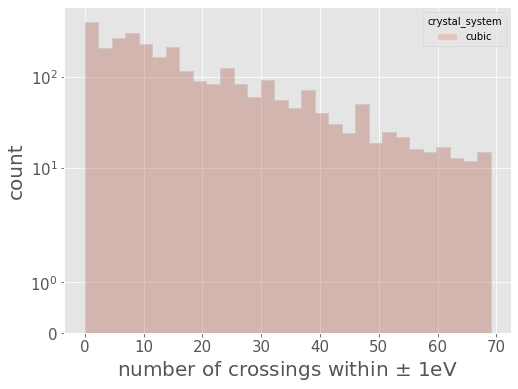

In [ ]:
fig = plt.figure(figsize =(8, 6))
ax=sns.histplot(df['crossings_+-1eV'], 
            color='grey', 
            bins=30, 
            label='whole data', 
            element="step", 
            stat="count",
            alpha=0.2
            )

ax=sns.histplot(data=df, 
            x=df['crossings_+-1eV'], 
            bins=30, 
            hue="crystal_system", 
            element="step", 
            stat="count", 
            alpha=0.2, 
            multiple="stack"
            )

plt.ylabel('count', fontsize = 20)
plt.yscale('symlog')
plt.xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)

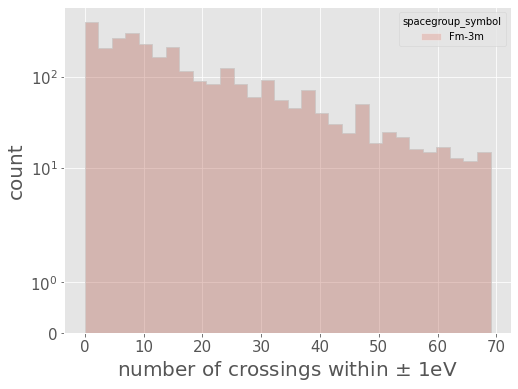

In [ ]:
fig = plt.figure(figsize =(8, 6))
ax=sns.histplot(df['crossings_+-1eV'], 
            color='grey', 
            bins=30, 
            label='whole data', 
            element="step", 
            stat="count",
            alpha=0.2
            )

ax=sns.histplot(data=df, 
            x=df['crossings_+-1eV'], 
            bins=30, 
            hue="spacegroup_symbol", 
            element="step", 
            stat="count", 
            alpha=0.2, 
            multiple="stack"
            )

plt.ylabel('count', fontsize = 20)
plt.yscale('symlog')
plt.xlabel('number of crossings within $\pm$ 1eV', fontsize = 20)
plt.tick_params(axis='both', labelsize = 15)

In [ ]:
df0 = df.drop(columns=['material_id', 
                       'formula', 
                       'spacegroup', 
                       'spacegroup_symbol', 
                       'crystal_system', 
                       'cif', 
                       #'crossings_+-1eV', 
                       'crossings_+-2eV', 
                       'composition', 
                       'structure_object', 
                       'composition_oxid', 
                       'structure_oxid', 
                       'electronic radial distribution function', 
                       'HOMO_character', 
                       'LUMO_character', 
                       'HOMO_element', 
                       'LUMO_element'
                       ], 
              #inplace=True
              )

df0.head(5)

,crossings_+-1eV,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,

In [ ]:
df0.isnull().sum()

crossings_+-1eV                                    0
density                                            0
vpa                                                0
packing fraction                                   0
max packing efficiency                             0
ewald_energy_per_atom                              0
mean absolute deviation in relative bond length    0
max relative bond length                           0
min relative bond length                           0
minimum neighbor distance variation                0
maximum neighbor distance variation                0
range neighbor distance variation                  0
mean neighbor distance variation                   0
avg_dev neighbor distance variation                0
mean absolute deviation in relative cell size      0
structural complexity per atom                     0
structural complexity per cell                     0
frac s valence electrons                           0
frac p valence electrons                      

In [ ]:
#fig, ax = plt.subplots(figsize =(16, 16))
#ax=sns.heatmap(df0.isnull(), 
#               cbar=False)

In [ ]:
#df0 = df0.dropna(axis=0)

In [ ]:
len(df0)

2899

In [ ]:
HOLU = df[['HOMO_character', 'LUMO_character']]
HOLU.head(5)

,HOMO_character,LUMO_character
0,d,d
1,d,d
2,s,s
3,s,s
4,s,s


In [ ]:
enc = preprocessing.OrdinalEncoder()

In [ ]:
enc.fit(HOLU)

OrdinalEncoder()

In [ ]:
HOLU[['HOMO_character', 'LUMO_character']] = enc.transform(HOLU)
HOLU.head(5)

,HOMO_character,LUMO_character
0,0.0,0.0
1,0.0,0.0
2,2.0,2.0
3,2.0,2.0
4,2.0,2.0


In [ ]:
df1 = pd.concat([df0, HOLU], axis=1, sort=False)
df1.head(5)

,crossings_+-1eV,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,

In [ ]:
df1.drop(columns=['MagpieData range Number',
 'MagpieData mean Number',
 'MagpieData avg_dev Number',
 'MagpieData mode Number',
 'MagpieData range MendeleevNumber',
 'MagpieData mean MendeleevNumber',
 'MagpieData avg_dev MendeleevNumber',
 'MagpieData mode MendeleevNumber',
 'MagpieData range AtomicWeight',
 'MagpieData mean AtomicWeight',
 'MagpieData avg_dev AtomicWeight',
 'MagpieData mode AtomicWeight',
 'MagpieData range MeltingT',
 'MagpieData mean MeltingT',
 'MagpieData avg_dev MeltingT',
 'MagpieData mode MeltingT',
 'MagpieData range Column',
 'MagpieData mean Column',
 'MagpieData avg_dev Column',
 'MagpieData mode Column',
 'MagpieData range Row',
 'MagpieData mean Row',
 'MagpieData avg_dev Row',
 'MagpieData mode Row',
 'MagpieData range CovalentRadius',
 'MagpieData mean CovalentRadius',
 'MagpieData avg_dev CovalentRadius',
 'MagpieData mode CovalentRadius',
 'MagpieData range Electronegativity',
 'MagpieData mean Electronegativity',
 'MagpieData avg_dev Electronegativity',
 'MagpieData mode Electronegativity',
 'MagpieData range NsValence',
 'MagpieData mean NsValence',
 'MagpieData avg_dev NsValence',
 'MagpieData mode NsValence',
 'MagpieData range NpValence',
 'MagpieData mean NpValence',
 'MagpieData avg_dev NpValence',
 'MagpieData mode NpValence',
 'MagpieData range NdValence',
 'MagpieData mean NdValence',
 'MagpieData avg_dev NdValence',
 'MagpieData mode NdValence',
 'MagpieData minimum NfValence',
 'MagpieData maximum NfValence',
 'MagpieData range NfValence',
 'MagpieData mean NfValence',
 'MagpieData avg_dev NfValence',
 'MagpieData mode NfValence',
 'MagpieData range NValence',
 'MagpieData mean NValence',
 'MagpieData avg_dev NValence',
 'MagpieData mode NValence',
 'MagpieData range NsUnfilled',
 'MagpieData mean NsUnfilled',
 'MagpieData avg_dev NsUnfilled',
 'MagpieData mode NsUnfilled',
 'MagpieData range NpUnfilled',
 'MagpieData mean NpUnfilled',
 'MagpieData avg_dev NpUnfilled',
 'MagpieData mode NpUnfilled',
 'MagpieData range NdUnfilled',
 'MagpieData mean NdUnfilled',
 'MagpieData avg_dev NdUnfilled',
 'MagpieData mode NdUnfilled',
 'MagpieData minimum NfUnfilled',
 'MagpieData maximum NfUnfilled',
 'MagpieData range NfUnfilled',
 'MagpieData mean NfUnfilled',
 'MagpieData avg_dev NfUnfilled',
 'MagpieData mode NfUnfilled',
 'MagpieData range NUnfilled',
 'MagpieData mean NUnfilled',
 'MagpieData avg_dev NUnfilled',
 'MagpieData mode NUnfilled',
 'MagpieData minimum GSvolume_pa',
 'MagpieData maximum GSvolume_pa',
 'MagpieData range GSvolume_pa',
 'MagpieData mean GSvolume_pa',
 'MagpieData avg_dev GSvolume_pa',
 'MagpieData mode GSvolume_pa',
 'MagpieData range GSbandgap',
 'MagpieData mean GSbandgap',
 'MagpieData avg_dev GSbandgap',
 'MagpieData mode GSbandgap',
 'MagpieData range GSmagmom',
 'MagpieData mean GSmagmom',
 'MagpieData avg_dev GSmagmom',
 'MagpieData mode GSmagmom',
 'MagpieData minimum SpaceGroupNumber',
 'MagpieData maximum SpaceGroupNumber',
 'MagpieData range SpaceGroupNumber',
 'MagpieData mean SpaceGroupNumber',
 'MagpieData avg_dev SpaceGroupNumber',
 'MagpieData mode SpaceGroupNumber'], inplace=True)

df1.head(5)

,crossings_+-1eV,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,HOMO_character,LUMO_character
0,0.0,2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,1.119629,0.738402,3.722205e-17,0.117822,1.178222e-01,0.072261,5.467293e-02,1.469407e-01,1.570951,15.709506,0.346939,0.612245,0.040816,0.000000,True,0.917619,0.214087,-0.170010,-0.170010,0.000000,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,2.0,0.0,5.0,0.0,2.0,1.0,7.0,0.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,0.0,1.97,0.0,0.000023,0.0,0.0
1,0.0,3.199327,15.019607,0.585386,0.427854,0.000000,8.378608e-02,1.117472,0.762751,2.179707e-16,0.121124,1.211236e-01,0.073153,5.756523e-02,1.491459e-01,1.570951,15.709506,0.272727,0.545455,0.181818,0.000000,True,0.902278,0.205192,-0.160771,-0.160771,0.000000,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,2.0,0.0,5.0,0.0,10.0,1.0,10.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.97,0.0,0.000000,0.0,0.0
2,8.0,8.595556,22.805898,0.761536,0.680175,0.000000,5.551115e-17,1.000000,1.000000,5.198152e-02,0.051982,1.804112e-16,0.051982,6.938894e-17,3.115610e-16,1.500000,6.000000,0.113208,0.000000,0.358491,0.528302,True,0.447278,0.098968,-0.141411,-0.141411,0.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,2.0,0.0,0.0,0.0,10.0,2.0,25.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.00,0.0,0.000000,2.0,2.0
3,2.0,13.370065,19.145765,0.696862,0.680175,-4.347833,0.000000e+00,1.000000,1.000000,5.198152e-02,0.051982,4.163336e-17,0.051982,1.387779e-17,3.247323e-16,1.500000,6.000000,0.067568,0.013514,0.540541,0.378378,True,0.134459,0.028262,-0.162334,-0.157407,0.004927,47.0,79.0,65.0,75.0,107.868200,196.966569,429.75,1337.33,11.0,13.0,5.0,6.0,136.0,145.0,1.78,2.54,1.0,2.0,0.0,1.0,10.0,10.0,11.0,25.0,0.0,1.0,0.0,5.0,0.0,0.0,1.0,5.0,0.0,0.00,0.0,0.000000,2.0,2.0
4,26.0,7.401171,13.998991,0.799845,0.680175,0.000000,2.775558e-17,1.000000,1.000000,5.198152e-02,0.051982,9.020562e-17,0.051982,3.122502e-17,1.903377e-16,1.500000,6.000000,0.347826,0.000000,0.652174,0.000000,True,0.031881,0.006662,-0.183636,-0.183636,0.000000,22.0,43.0,43.0,55.0,47.867000,98.000000,1811.00,2430.00,4.0,8.0,4.0,5.0,132.0,160.0,1.54,1.90,2.0,2.0,0.0,0.0,2.0,6.0,4.0,8.0,0.0,0.0,0.0,0.0,4.0,8.0,4.0,8.0,0.0,0.00,0.0,2.110663,2.0,2.0


In [ ]:
df1.to_pickle('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/no-f-matminer-FeaturedData_complete1.pkl')

In [ ]:
#for item_i in range(df.shape[0]):
#  try:
#    homo_elem = element(df.loc[item_i, 'HOMO_element'])
#    col_name = "HOMO_element"
#    #df1.at[item_i, str(col_name)]=str(homo_elem.atomic_number)
#  except:
#    col_name = "HOMO_element"
#    #df1.at[item_i, str(col_name)]="NaN"

In [ ]:
Number = df1.filter(regex=r' Number*')
Number.head(5)

,MagpieData minimum Number,MagpieData maximum Number
0,9.0,22.0
1,9.0,46.0
2,20.0,79.0
3,47.0,79.0
4,22.0,43.0


In [ ]:
poly_Number = PolynomialFeatures(interaction_only=True)

In [ ]:
Number_data = poly_Number.fit_transform(Number)
Number_data

array([[1.00e+00, 9.00e+00, 2.20e+01, 1.98e+02],
       [1.00e+00, 9.00e+00, 4.60e+01, 4.14e+02],
       [1.00e+00, 2.00e+01, 7.90e+01, 1.58e+03],
       ...,
       [1.00e+00, 1.90e+01, 2.30e+01, 4.37e+02],
       [1.00e+00, 2.20e+01, 4.40e+01, 9.68e+02],
       [1.00e+00, 1.30e+01, 3.30e+01, 4.29e+02]])

In [ ]:
Number_df = pd.DataFrame(data=Number_data, columns=poly_Number.get_feature_names(list(Number)))
Number_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum Number MagpieData maximum Number
0,1.0,9.0,22.0,198.0
1,1.0,9.0,46.0,414.0
2,1.0,20.0,79.0,1580.0
3,1.0,47.0,79.0,3713.0
4,1.0,22.0,43.0,946.0


In [ ]:
MendeleevNumber = df1.filter(regex=r'MendeleevNumber*')
MendeleevNumber.head(5)

,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber
0,2.0,93.0
1,2.0,93.0
2,7.0,66.0
3,65.0,75.0
4,43.0,55.0


In [ ]:
poly_MendeleevNumber = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_MendeleevNumber.fit_transform(MendeleevNumber)

array([[1.000e+00, 2.000e+00, 9.300e+01, 1.860e+02],
       [1.000e+00, 2.000e+00, 9.300e+01, 1.860e+02],
       [1.000e+00, 7.000e+00, 6.600e+01, 4.620e+02],
       ...,
       [1.000e+00, 3.000e+00, 4.600e+01, 1.380e+02],
       [1.000e+00, 4.300e+01, 5.600e+01, 2.408e+03],
       [1.000e+00, 7.300e+01, 8.400e+01, 6.132e+03]])

In [ ]:
MendeleevNumber_df = pd.DataFrame(data=poly_MendeleevNumber.fit_transform(MendeleevNumber), columns=poly_MendeleevNumber.get_feature_names(list(MendeleevNumber)))
MendeleevNumber_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber
0,1.0,2.0,93.0,186.0
1,1.0,2.0,93.0,186.0
2,1.0,7.0,66.0,462.0
3,1.0,65.0,75.0,4875.0
4,1.0,43.0,55.0,2365.0


In [ ]:
AtomicWeight = df1.filter(regex=r'AtomicWeight*')
AtomicWeight.head(5)

,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight
0,18.998403,47.867000
1,18.998403,106.420000
2,40.078000,196.966569
3,107.868200,196.966569
4,47.867000,98.000000


In [ ]:
poly_AtomicWeight = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_AtomicWeight.fit_transform(AtomicWeight)

array([[1.00000000e+00, 1.89984032e+01, 4.78670000e+01, 9.09396566e+02],
       [1.00000000e+00, 1.89984032e+01, 1.06420000e+02, 2.02181007e+03],
       [1.00000000e+00, 4.00780000e+01, 1.96966569e+02, 7.89402615e+03],
       ...,
       [1.00000000e+00, 3.90983000e+01, 5.09415000e+01, 1.99172605e+03],
       [1.00000000e+00, 4.78670000e+01, 1.01070000e+02, 4.83791769e+03],
       [1.00000000e+00, 2.69815386e+01, 7.49216000e+01, 2.02150004e+03]])

In [ ]:
AtomicWeight_df = pd.DataFrame(data=poly_AtomicWeight.fit_transform(AtomicWeight), columns=poly_AtomicWeight.get_feature_names(list(AtomicWeight)))
AtomicWeight_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight
0,1.0,18.998403,47.867000,909.396566
1,1.0,18.998403,106.420000,2021.810069
2,1.0,40.078000,196.966569,7894.026152
3,1.0,107.868200,196.966569,21246.429258
4,1.0,47.867000,98.000000,4690.966000


In [ ]:
MeltingT = df1.filter(regex=r'MeltingT*')
MeltingT.head(5)

,MagpieData minimum MeltingT,MagpieData maximum MeltingT
0,53.50,1941.00
1,53.50,1828.05
2,1115.00,2041.40
3,429.75,1337.33
4,1811.00,2430.00


In [ ]:
poly_MeltingT = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_MeltingT.fit_transform(MeltingT)

array([[1.0000000e+00, 5.3500000e+01, 1.9410000e+03, 1.0384350e+05],
       [1.0000000e+00, 5.3500000e+01, 1.8280500e+03, 9.7800675e+04],
       [1.0000000e+00, 1.1150000e+03, 2.0414000e+03, 2.2761610e+06],
       ...,
       [1.0000000e+00, 3.3653000e+02, 2.1830000e+03, 7.3464499e+05],
       [1.0000000e+00, 1.9410000e+03, 2.7500000e+03, 5.3377500e+06],
       [1.0000000e+00, 9.3347000e+02, 1.0900000e+03, 1.0174823e+06]])

In [ ]:
MeltingT_df = pd.DataFrame(data=poly_MeltingT.fit_transform(MeltingT), columns=poly_MeltingT.get_feature_names(list(MeltingT)))
MeltingT_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum MeltingT MagpieData maximum MeltingT
0,1.0,53.50,1941.00,1.038435e+05
1,1.0,53.50,1828.05,9.780068e+04
2,1.0,1115.00,2041.40,2.276161e+06
3,1.0,429.75,1337.33,5.747176e+05
4,1.0,1811.00,2430.00,4.400730e+06


In [ ]:
Column = df1.filter(regex=r'Column*')
Column.head(5)

,MagpieData minimum Column,MagpieData maximum Column
0,1.0,17.0
1,1.0,17.0
2,2.0,11.0
3,11.0,13.0
4,4.0,8.0


In [ ]:
poly_Column = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_Column.fit_transform(Column)

array([[  1.,   1.,  17.,  17.],
       [  1.,   1.,  17.,  17.],
       [  1.,   2.,  11.,  22.],
       ...,
       [  1.,   1.,   5.,   5.],
       [  1.,   4.,   8.,  32.],
       [  1.,  13.,  15., 195.]])

In [ ]:
Column_df = pd.DataFrame(data=poly_Column.fit_transform(Column), columns=poly_Column.get_feature_names(list(Column)))
Column_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Column MagpieData maximum Column
0,1.0,1.0,17.0,17.0
1,1.0,1.0,17.0,17.0
2,1.0,2.0,11.0,22.0
3,1.0,11.0,13.0,143.0
4,1.0,4.0,8.0,32.0


In [ ]:
Row = df1.filter(regex=r'Row*')
Row.head(5)

,MagpieData minimum Row,MagpieData maximum Row
0,2.0,4.0
1,2.0,5.0
2,4.0,6.0
3,5.0,6.0
4,4.0,5.0


In [ ]:
poly_Row = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_Row.fit_transform(Row)

array([[ 1.,  2.,  4.,  8.],
       [ 1.,  2.,  5., 10.],
       [ 1.,  4.,  6., 24.],
       ...,
       [ 1.,  4.,  4., 16.],
       [ 1.,  4.,  5., 20.],
       [ 1.,  3.,  4., 12.]])

In [ ]:
Row_df = pd.DataFrame(data=poly_Row.fit_transform(Row), columns=poly_Row.get_feature_names(list(Row)))
Row_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum Row MagpieData maximum Row
0,1.0,2.0,4.0,8.0
1,1.0,2.0,5.0,10.0
2,1.0,4.0,6.0,24.0
3,1.0,5.0,6.0,30.0
4,1.0,4.0,5.0,20.0


In [ ]:
CovalentRadius = df1.filter(regex=r'CovalentRadius*')
CovalentRadius.head(5)

,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius
0,57.0,203.0
1,57.0,166.0
2,136.0,176.0
3,136.0,145.0
4,132.0,160.0


In [ ]:
poly_CovalentRadius = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_CovalentRadius.fit_transform(CovalentRadius)

array([[1.0000e+00, 5.7000e+01, 2.0300e+02, 1.1571e+04],
       [1.0000e+00, 5.7000e+01, 1.6600e+02, 9.4620e+03],
       [1.0000e+00, 1.3600e+02, 1.7600e+02, 2.3936e+04],
       ...,
       [1.0000e+00, 1.5300e+02, 2.0300e+02, 3.1059e+04],
       [1.0000e+00, 1.4600e+02, 1.6400e+02, 2.3944e+04],
       [1.0000e+00, 1.1900e+02, 1.2100e+02, 1.4399e+04]])

In [ ]:
CovalentRadius_df = pd.DataFrame(data=poly_CovalentRadius.fit_transform(CovalentRadius), columns=poly_CovalentRadius.get_feature_names(list(CovalentRadius)))
CovalentRadius_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius
0,1.0,57.0,203.0,11571.0
1,1.0,57.0,166.0,9462.0
2,1.0,136.0,176.0,23936.0
3,1.0,136.0,145.0,19720.0
4,1.0,132.0,160.0,21120.0


In [ ]:
Electronegativity = df1.filter(regex=r'Electronegativity*')
Electronegativity.head(5)

,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity
0,0.82,3.98
1,0.93,3.98
2,1.00,2.54
3,1.78,2.54
4,1.54,1.90


In [ ]:
poly_Electronegativity = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_Electronegativity.fit_transform(Electronegativity)

array([[1.    , 0.82  , 3.98  , 3.2636],
       [1.    , 0.93  , 3.98  , 3.7014],
       [1.    , 1.    , 2.54  , 2.54  ],
       ...,
       [1.    , 0.82  , 1.63  , 1.3366],
       [1.    , 1.54  , 2.2   , 3.388 ],
       [1.    , 1.61  , 2.18  , 3.5098]])

In [ ]:
Electronegativity_df = pd.DataFrame(data=poly_Electronegativity.fit_transform(Electronegativity), columns=poly_Electronegativity.get_feature_names(list(Electronegativity)))
Electronegativity_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum Electronegativity MagpieData maximum Electronegativity
0,1.0,0.82,3.98,3.2636
1,1.0,0.93,3.98,3.7014
2,1.0,1.00,2.54,2.5400
3,1.0,1.78,2.54,4.5212
4,1.0,1.54,1.90,2.9260


In [ ]:
NsValence = df1.filter(regex=r'NsValence*')
NsValence.head(5)

,MagpieData minimum NsValence,MagpieData maximum NsValence
0,1.0,2.0
1,0.0,2.0
2,1.0,2.0
3,1.0,2.0
4,2.0,2.0


In [ ]:
poly_NsValence = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_NsValence.fit_transform(NsValence)

array([[1., 1., 2., 2.],
       [1., 0., 2., 0.],
       [1., 1., 2., 2.],
       ...,
       [1., 1., 2., 2.],
       [1., 1., 2., 2.],
       [1., 2., 2., 4.]])

In [ ]:
NsValence_df = pd.DataFrame(data=poly_NsValence.fit_transform(NsValence), columns=poly_NsValence.get_feature_names(list(NsValence)))
NsValence_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData minimum NsValence MagpieData maximum NsValence
0,1.0,1.0,2.0,2.0
1,1.0,0.0,2.0,0.0
2,1.0,1.0,2.0,2.0
3,1.0,1.0,2.0,2.0
4,1.0,2.0,2.0,4.0


In [ ]:
NpValence = df1.filter(regex=r'NpValence*')
NpValence.head(5)

,MagpieData minimum NpValence,MagpieData maximum NpValence
0,0.0,5.0
1,0.0,5.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0


In [ ]:
poly_NpValence = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_NpValence.fit_transform(NpValence)

array([[1., 0., 5., 0.],
       [1., 0., 5., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 1., 3., 3.]])

In [ ]:
NpValence_df = pd.DataFrame(data=poly_NpValence.fit_transform(NpValence), columns=poly_NpValence.get_feature_names(list(NpValence)))
NpValence_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData minimum NpValence MagpieData maximum NpValence
0,1.0,0.0,5.0,0.0
1,1.0,0.0,5.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [ ]:
NdValence = df1.filter(regex=r'NdValence*')
NdValence.head(5)

,MagpieData minimum NdValence,MagpieData maximum NdValence
0,0.0,2.0
1,0.0,10.0
2,0.0,10.0
3,10.0,10.0
4,2.0,6.0


In [ ]:
poly_NdValence = PolynomialFeatures(interaction_only=True)

In [ ]:
NdValence_df = pd.DataFrame(data=poly_NdValence.fit_transform(NdValence), columns=poly_NdValence.get_feature_names(list(NdValence)))
NdValence_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NdValence MagpieData maximum NdValence
0,1.0,0.0,2.0,0.0
1,1.0,0.0,10.0,0.0
2,1.0,0.0,10.0,0.0
3,1.0,10.0,10.0,100.0
4,1.0,2.0,6.0,12.0


In [ ]:
NValence = df1.filter(regex=r'NValence*')
NValence.head(5)

,MagpieData minimum NValence,MagpieData maximum NValence
0,1.0,7.0
1,1.0,10.0
2,2.0,25.0
3,11.0,25.0
4,4.0,8.0


In [ ]:
poly_NValence = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_NValence = PolynomialFeatures(interaction_only=True)

In [ ]:
NValence_df = pd.DataFrame(data=poly_NValence.fit_transform(NValence), columns=poly_NValence.get_feature_names(list(NValence)))
NValence_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData minimum NValence MagpieData maximum NValence
0,1.0,1.0,7.0,7.0
1,1.0,1.0,10.0,10.0
2,1.0,2.0,25.0,50.0
3,1.0,11.0,25.0,275.0
4,1.0,4.0,8.0,32.0


In [ ]:
NsUnfilled = df1.filter(regex=r'NsUnfilled*')
NsUnfilled.head(5)

,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,0.0


In [ ]:
poly_NsUnfilled = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_NsUnfilled.fit_transform(NsUnfilled)

array([[1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       ...,
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [ ]:
NsUnfilled_df = pd.DataFrame(data=poly_NsUnfilled.fit_transform(NsUnfilled), columns=poly_NsUnfilled.get_feature_names(list(NsUnfilled)))
NsUnfilled_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData minimum NsUnfilled MagpieData maximum NsUnfilled
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0


In [ ]:
NpUnfilled = df1.filter(regex=r'NpUnfilled*')
NpUnfilled.head(5)

,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled
0,0.0,1.0
1,0.0,1.0
2,0.0,0.0
3,0.0,5.0
4,0.0,0.0


In [ ]:
poly_NpUnfilled = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_NpUnfilled.fit_transform(NpUnfilled)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.],
       ...,
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  3.,  5., 15.]])

In [ ]:
NpUnfilled_df = pd.DataFrame(data=poly_NpUnfilled.fit_transform(NpUnfilled), columns=poly_NpUnfilled.get_feature_names(list(NpUnfilled)))
NpUnfilled_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled
0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,5.0,0.0
4,1.0,0.0,0.0,0.0


In [ ]:
NdUnfilled = df1.filter(regex=r'NdUnfilled*')
NdUnfilled.head(5)

,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled
0,0.0,8.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,4.0,8.0


In [ ]:
poly_NdUnfilled = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_NdUnfilled.fit_transform(NdUnfilled)

array([[ 1.,  0.,  8.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 1.,  0.,  1.,  0.],
       ...,
       [ 1.,  0.,  7.,  0.],
       [ 1.,  3.,  8., 24.],
       [ 1.,  0.,  0.,  0.]])

In [ ]:
NdUnfilled_df = pd.DataFrame(data=poly_NdUnfilled.fit_transform(NdUnfilled), columns=poly_NdUnfilled.get_feature_names(list(NdUnfilled)))
NdUnfilled_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled
0,1.0,0.0,8.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0
4,1.0,4.0,8.0,32.0


In [ ]:
NUnfilled = df1.filter(regex=r'NUnfilled*')
NUnfilled.head(5)

,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled
0,1.0,8.0
1,0.0,1.0
2,0.0,2.0
3,1.0,5.0
4,4.0,8.0


In [ ]:
poly_NUnfilled = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_NUnfilled.fit_transform(NUnfilled)

array([[ 1.,  1.,  8.,  8.],
       [ 1.,  0.,  1.,  0.],
       [ 1.,  0.,  2.,  0.],
       ...,
       [ 1.,  1.,  7.,  7.],
       [ 1.,  4.,  8., 32.],
       [ 1.,  3.,  5., 15.]])

In [ ]:
NUnfilled_df = pd.DataFrame(data=poly_NUnfilled.fit_transform(NUnfilled), columns=poly_NUnfilled.get_feature_names(list(NUnfilled)))
NUnfilled_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData minimum NUnfilled MagpieData maximum NUnfilled
0,1.0,1.0,8.0,8.0
1,1.0,0.0,1.0,0.0
2,1.0,0.0,2.0,0.0
3,1.0,1.0,5.0,5.0
4,1.0,4.0,8.0,32.0


In [ ]:
GSbandgap = df1.filter(regex=r'GSbandgap*')
GSbandgap.head(5)

,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap
0,0.0,1.97
1,0.0,1.97
2,0.0,0.00
3,0.0,0.00
4,0.0,0.00


In [ ]:
poly_GSbandgap = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_GSbandgap.fit_transform(GSbandgap)

array([[1.  , 0.  , 1.97, 0.  ],
       [1.  , 0.  , 1.97, 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       ...,
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  ]])

In [ ]:
GSbandgap_df = pd.DataFrame(data=poly_GSbandgap.fit_transform(GSbandgap), columns=poly_GSbandgap.get_feature_names(list(GSbandgap)))
GSbandgap_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData minimum GSbandgap MagpieData maximum GSbandgap
0,1.0,0.0,1.97,0.0
1,1.0,0.0,1.97,0.0
2,1.0,0.0,0.00,0.0
3,1.0,0.0,0.00,0.0
4,1.0,0.0,0.00,0.0


In [ ]:
GSmagmom = df1.filter(regex=r'GSmagmom*')
GSmagmom.head(5)

,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom
0,0.0,0.000023
1,0.0,0.000000
2,0.0,0.000000
3,0.0,0.000000
4,0.0,2.110663


In [ ]:
poly_GSmagmom = PolynomialFeatures(interaction_only=True)

In [ ]:
poly_GSmagmom.fit_transform(GSmagmom)

array([[1.00000000e+00, 0.00000000e+00, 2.25333333e-05, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 2.25333333e-05, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
GSmagmom_df = pd.DataFrame(data=poly_GSmagmom.fit_transform(GSmagmom), columns=poly_GSmagmom.get_feature_names(list(GSmagmom)))
GSmagmom_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,1,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData minimum GSmagmom MagpieData maximum GSmagmom
0,1.0,0.0,0.000023,0.0
1,1.0,0.0,0.000000,0.0
2,1.0,0.0,0.000000,0.0
3,1.0,0.0,0.000000,0.0
4,1.0,0.0,2.110663,0.0


In [ ]:
data1 = pd.concat([df1, 
           GSmagmom_df, 
           GSbandgap_df, 
           NUnfilled_df, 
           NdUnfilled_df, 
           NpUnfilled_df, 
           NsUnfilled_df, 
           NValence_df, 
           NdValence_df, 
           NpValence_df, 
           NsValence_df, 
           Electronegativity_df, 
           CovalentRadius_df, 
           Row_df, 
           Column_df, 
           MeltingT_df, 
           AtomicWeight_df, 
           MendeleevNumber_df, 
           Number_df], 
           axis=1)

data1.head()

,crossings_+-1eV,density,vpa,packing fraction,max packing efficiency,ewald_energy_per_atom,mean absolute deviation in relative bond length,max relative bond length,min relative bond length,minimum neighbor distance variation,maximum neighbor distance variation,range neighbor distance variation,mean neighbor distance variation,avg_dev neighbor distance variation,mean absolute deviation in relative cell size,structural complexity per atom,structural complexity per cell,frac s valence electrons,frac p valence electrons,frac d valence electrons,frac f valence electrons,compound possible,max ionic char,avg ionic char,HOMO_energy,LUMO_energy,gap_AO,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,1,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData minimum GSmagmom MagpieData maximum GSmagmom,1,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,1,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,1,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,1,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,1,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData minimum NsUnfilled MagpieData maximum NsUnfilled,1,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData minimum NValence MagpieData maximum NValence,1,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NdValence MagpieData maximum NdValence,1,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData minimum NpValence MagpieData maximum NpValence,1,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData minimum NsValence MagpieData maximum NsValence,1,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,1,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,1,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum Row MagpieData maximum Row,1,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Column MagpieData maximum Column,1,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum MeltingT MagpieData maximum MeltingT,1,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,1,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,1,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum Number MagpieData maximum Number
0,0.0,2.833639,15.414612,0.832127,0.412249,-9.397323,8.289707e-02,1.119629,0.738402,3.72220

In [ ]:
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

In [ ]:
sel.fit(data1)

VarianceThreshold(threshold=0.15999999999999998)

In [ ]:
features_indx = list(sel.get_support(indices = True))

In [ ]:
data2 = data1.iloc[:, features_indx]
data2.head(5)

,crossings_+-1eV,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData maximum GSmagmom,MagpieData maximum GSbandgap,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData maximum NsUnfilled,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData maximum NpValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum Number MagpieData maximum Number
0,0.0,2.833639,15.414612,-9.397323,15.709506,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,5.0,0.0,2.0,1.0,7.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,1.97,0.000023,0.0,0.0,0.000023,1.97,0.0,1.0,8.0,8.0,0.0,8.0,0.0,0.0,1.0,0.0,1.0,1.0,7.0,7.0,0.0,2.0,0.0,5.0,0.0,1.0,2.0,0.82,3.98,3.2636,57.0,203.0,11571.0,2.0,4.0,8.0,1.0,17.0,17.0,53.50,1941.00,1.038435e+05,18.998403,47.867000,909.396566,2.0,93.0,186.0,9.0,22.0,198.0
1,0.0,3.199327,15.019607,0.000000,15.709506,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,5.0,0.0,10.0,1.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.97,0.000000,0.0,0.0,0.000000,1.97,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,10.0,10.0,0.0,10.0,0.0,5.0,0.0,0.0,0.0,0.93,3.98,3.7014,57.0,166.0,9462.0,2.0,5.0,10.0,1.0,17.0,17.0,53.50,1828.05,9.780068e+04,18.998403,106.420000,2021.810069,2.0,93.0,186.0,9.0,46.0,414.0
2,8.0,8.595556,22.805898,0.000000,6.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,0.0,0.0,10.0,2.0,25.0,1.0,0.0,0.0,0.0,1

In [ ]:
len(data2)

2930

In [ ]:
len(data2.columns)

85

In [ ]:
data2.isnull().sum()

crossings_+-1eV                                                              31
density                                                                      31
vpa                                                                          31
ewald_energy_per_atom                                                        31
structural complexity per cell                                               31
MagpieData minimum Number                                                    31
MagpieData maximum Number                                                    31
MagpieData minimum MendeleevNumber                                           31
MagpieData maximum MendeleevNumber                                           31
MagpieData minimum AtomicWeight                                              31
MagpieData maximum AtomicWeight                                              31
MagpieData minimum MeltingT                                                  31
MagpieData maximum MeltingT             

In [ ]:
data2 = data2.loc[:,~data2.columns.duplicated()]
data2.head(5)

,crossings_+-1eV,density,vpa,ewald_energy_per_atom,structural complexity per cell,MagpieData minimum Number,MagpieData maximum Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData minimum NsValence,MagpieData maximum NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData maximum NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData maximum GSbandgap,MagpieData maximum GSmagmom,HOMO_character,LUMO_character,MagpieData minimum GSbandgap MagpieData maximum GSbandgap,MagpieData minimum NUnfilled MagpieData maximum NUnfilled,MagpieData minimum NdUnfilled MagpieData maximum NdUnfilled,MagpieData minimum NpUnfilled MagpieData maximum NpUnfilled,MagpieData minimum NValence MagpieData maximum NValence,MagpieData minimum NdValence MagpieData maximum NdValence,MagpieData minimum NpValence MagpieData maximum NpValence,MagpieData minimum NsValence MagpieData maximum NsValence,MagpieData minimum Electronegativity MagpieData maximum Electronegativity,MagpieData minimum CovalentRadius MagpieData maximum CovalentRadius,MagpieData minimum Row MagpieData maximum Row,MagpieData minimum Column MagpieData maximum Column,MagpieData minimum MeltingT MagpieData maximum MeltingT,MagpieData minimum AtomicWeight MagpieData maximum AtomicWeight,MagpieData minimum MendeleevNumber MagpieData maximum MendeleevNumber,MagpieData minimum Number MagpieData maximum Number
0,0.0,2.833639,15.414612,-9.397323,15.709506,9.0,22.0,2.0,93.0,18.998403,47.867000,53.50,1941.00,1.0,17.0,2.0,4.0,57.0,203.0,0.82,3.98,1.0,5.0,0.0,2.0,1.0,7.0,1.0,0.0,1.0,0.0,8.0,1.0,8.0,1.97,0.000023,0.0,0.0,0.0,8.0,0.0,0.0,7.0,0.0,0.0,2.0,3.2636,11571.0,8.0,17.0,1.038435e+05,909.396566,186.0,198.0
1,0.0,3.199327,15.019607,0.000000,15.709506,9.0,46.0,2.0,93.0,18.998403,106.420000,53.50,1828.05,1.0,17.0,2.0,5.0,57.0,166.0,0.93,3.98,0.0,5.0,0.0,10.0,1.0,10.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.97,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,3.7014,9462.0,10.0,17.0,9.780068e+04,2021.810069,186.0,414.0
2,8.0,8.595556,22.805898,0.000000,6.000000,20.0,79.0,7.0,66.0,40.078000,196.966569,1115.00,2041.40,2.0,11.0,4.0,6.0,136.0,176.0,1.00,2.54,1.0,0.0,0.0,10.0,2.0,25.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.00,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,2.0,2.5400,23936.0,24.0,22.0,2.276161e+06,7894.026152,462.0,1580.0
3,2.0,13.370065,19.145765,-4.347833,6.000000,47.0,79.0,65.0,75.0,107.868200,196.966569,429.75,1337.33,11.0,13.0,5.0,6.0,136.0,145.0,1.78,2.54,1.0,1.0,10.0,10.0,11.0,25.0,1.0,0.0,5.0,0.0,0.0,1.0,5.0,0.00,0.000000,2.0,2.0,0.0,5.0,0.0,0.0,275.0,100.0,0.0,2.0,4.5212,19720.0,30.0,143.0,5.747176e+05,21246.429258,4875.0,3713.0
4,26.0,7.401171,13.998991,0.000000,6.000000,22.0,43.0,43.0,55.0,47.867000,98.000000,1811.00,2430.00,4.0,8.0,4.0,5.0,132.0,160.0,1.54,1.90,2.0,0.0,2.0,6.0,4.0,8.0,0.0,0.0,0.0,4.0,8.0,4.0,8.0,0.00,2.110663,2.0,2.0,0.0,32.0,32.0,0.0,32.0,12.0,0.0,4.0,2.9260,21120.0,20.0,32.0,4.400730e+06,4690.966000,2365.0,946.0


In [ ]:
len(data2.columns)

54

In [ ]:
data2.isnull().sum()

crossings_+-1eV                                                              31
density                                                                      31
vpa                                                                          31
ewald_energy_per_atom                                                        31
structural complexity per cell                                               31
MagpieData minimum Number                                                    31
MagpieData maximum Number                                                    31
MagpieData minimum MendeleevNumber                                           31
MagpieData maximum MendeleevNumber                                           31
MagpieData minimum AtomicWeight                                              31
MagpieData maximum AtomicWeight                                              31
MagpieData minimum MeltingT                                                  31
MagpieData maximum MeltingT             

In [ ]:
np.isinf(data2).sum()

crossings_+-1eV                                                              0
density                                                                      0
vpa                                                                          0
ewald_energy_per_atom                                                        0
structural complexity per cell                                               0
MagpieData minimum Number                                                    0
MagpieData maximum Number                                                    0
MagpieData minimum MendeleevNumber                                           0
MagpieData maximum MendeleevNumber                                           0
MagpieData minimum AtomicWeight                                              0
MagpieData maximum AtomicWeight                                              0
MagpieData minimum MeltingT                                                  0
MagpieData maximum MeltingT                         

In [ ]:
data2 = data2.dropna(axis=0)

In [ ]:
data2.isnull().sum()

crossings_+-1eV                                                              0
density                                                                      0
vpa                                                                          0
ewald_energy_per_atom                                                        0
structural complexity per cell                                               0
MagpieData minimum Number                                                    0
MagpieData maximum Number                                                    0
MagpieData minimum MendeleevNumber                                           0
MagpieData maximum MendeleevNumber                                           0
MagpieData minimum AtomicWeight                                              0
MagpieData maximum AtomicWeight                                              0
MagpieData minimum MeltingT                                                  0
MagpieData maximum MeltingT                         

In [ ]:
len(data2)

2868

Text(0.5, 113.09375, 'Features')

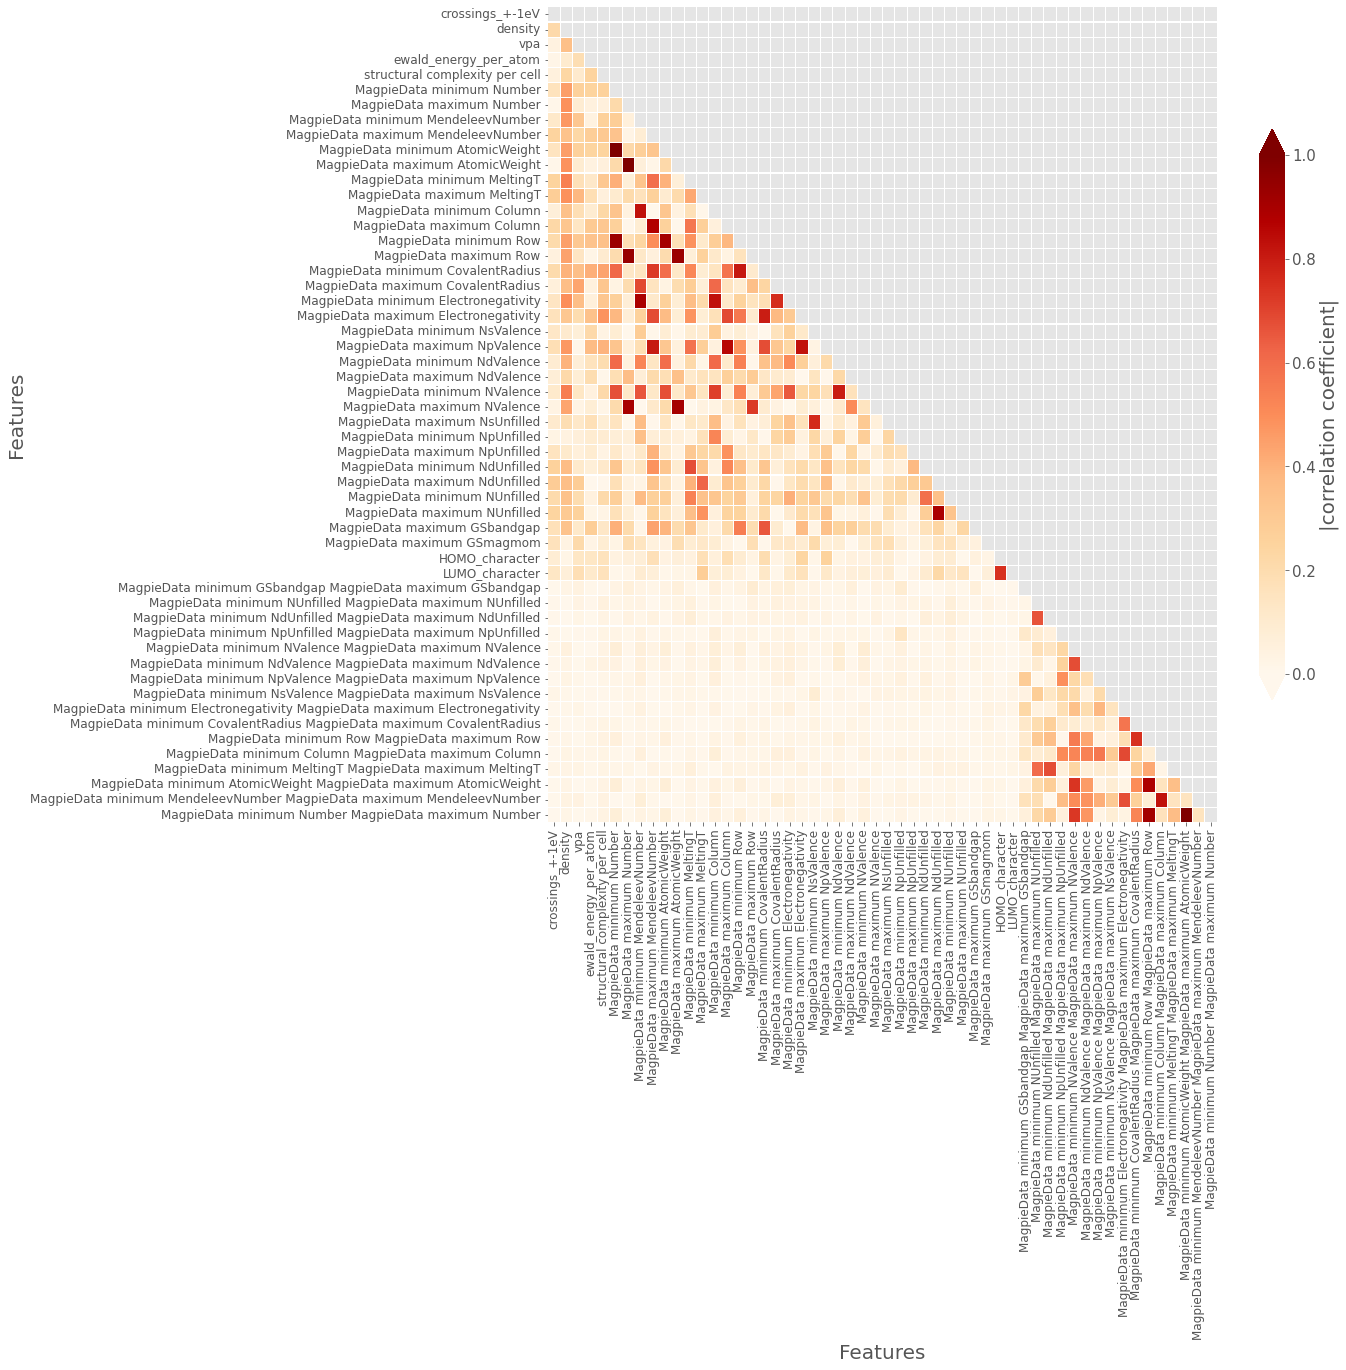

In [ ]:
matrix = np.triu(data2.corr(method ='pearson').abs())

f, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(data2.corr(method ='pearson').abs(), 
                 mask=matrix, 
                 cmap='OrRd', 
                 linecolor='white', 
                 linewidths=0.1, 
                 #annot=True, 
                 #annot_kws={'fontsize': 10, 
                       #'weight': 'bold'
                 #     }, 
                 #fmt='.2f', 
                 vmin=0, 
                 vmax=1, 
                 cbar_kws={'label': '|correlation coefficient|',  
                           'extend': 'both', 
                           'shrink':0.7}
                )

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)

ax.set_ylabel('Features', fontsize = 20)
ax.set_xlabel('Features', fontsize = 20)
#f.savefig('Feature_Correlation.png', bbox_inches='tight', dpi=400);

In [ ]:
data2.to_pickle('/content/drive/MyDrive/ColabNotebooks/Fourth_Pass: Ale_DataBase/no-f-matminer-FeaturedData_complete2.pkl')